<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación diagnóstica de mamografías </h2>
</center>

<h3> Práctico II -  Análisis y Curación <h3>
<h4>Integrantes: Mario Agustín Sgró, Lucía Benítez y Carolina Díaz <h4>

**Objetivo y alcance:** 
    Aprendizaje sobre limpieza y mejora de la base de datos. 
    Manejo y entendimiento de algunas técnicas de aumento de información, manejo de datos faltantes, imputación y reducción de dimensionalidad. 
Método: Se utilizarán componentes principales, algoritmo de k-medias, distancia entre observaciones, k-vecinos más cercanos, escalado de variables/features.

**Estructura del informe:**
Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

1- Analizar los tipos de datos y si hay algun inconveniente con la codificación de las variables.

2- Identificar los datos faltantes de la base de datos.

3- Realizar un listado con resumen explicativo de algunas técnicas de tratamiento de datos faltantes. 

4- Elegir tres abordajes (con alguna variante de metapámetros si las tuviera) incluída la imputación usando el vecino más cercano. 

5- Investigar opciones de aumentación de información, como por ejemplo polinómica de algunas variables, implementar algunas y evaluar su aporte en la clasificación.

6- Realizar un reescalado de las variables utilizando min-max y Z-score.

7- Realizar reducción de dimensionalidad usando componentes principales y otra que considere adecuada.

8- Combinar los abordajes.


In [208]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import chardet
import string
from fancyimpute import KNN
#para que funcione en el conda, correr por única vez el siguiente comando:
#!conda install -c brittainhard fancyimpute
plt.rcParams['figure.figsize'] = (200, 200)

In [209]:
if sns.__version__ != '0.9.0':
    print('Atención! utilizamos seaborn versión 0.9.0')

In [210]:
pd.options.display.max_columns = 200
#pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000

Lectura del data-set

In [211]:
dataframe = pd.read_csv('datos/Datos_Mamografias.csv',sep=',',index_col=['Imagen'])

### Descripción de la base de datos:

In [212]:
dataframe.head(3)

,Age,View,Laterality,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_5,Dcm_6,Dcm_7,Dcm_8,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_15,Dcm_16,Dcm_17,Dcm_18,Dcm_19,Dcm_20,Dcm_21,Dcm_22,Dcm_23,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48,ACR
Imagen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Imagen_0.npy,47.0,CC,R,29.0,130.0,155.0,1115.0,RHODIUM,0.05,0.3,TUNGSTEN,54.0,58.5,700.0,621.0,1.073,-8.4,AUTOMATIC,AutoFilter,321.0,6.53,0.0172,0.531,2047.0,4096.0,NO,1906717.0,1204.431581,1108.0,651.401605,0.631631,-0.158630,771.0,582.461892,617.414299,571.626601,1.254898,0.340503,0.478727,26.263890,50.872416,30.246896,39.025868,57.284054,56.462588,0.769471,0.176043,0.012500,0.000003,29632.094980,0.965015,423492.945587,0.010546,2407.880580,1.664340e+06,12.237075,18.933134,8.625112e-07,8.446691,-0.209392,0.994013,0.000002,35926.620735,0.957571,423372.418259,0.009612,2407.639224,1.657563e+06,12.235604,19.052746,7.760232e-07,8.586088,-0.198048,0.992383,0.000003,30038.183717,0.964600,424267.419997,0.010677,2408.826967,1.667031e+06,12.238215,18.941108,8.581286e-07,8.455624,-0.208819,0.993943,0.000002,35106.380011,0.958552,423500.102813,0.009655,2407.789176,1.658894e+06,12.236029,19.042339,7.841840e-07,8.570271,-0.199065,0.992547,1.304171,0.026670,226.278823,41.339488,-0.004142,-0.801469,1.739567,0.322655,571.489193,158.341050,-1.165407,-0.038599,1.770398,0.299554,1114.887169,161.670179,-1.183844,0.085194,1.720933,0.239346,1706.529132,189.689059,-1.103810,0.225300,1.563104,0.110528,2449.700145,306.298340,1.157895,1.152985,1.748927,0.349874,1941.302019,416.666606,0.676891,0.995952,1.852387,0.649428,1560.111365,524.693103,0.226560,0.823606,1.911039,0.972917,1231.635371,639.340074,-0.129694,0.658866,1.347935,0.041248,303.067490,57.467044,2.316524,0.466817,1.704150,0.247506,768.162586,262.713541,-0.122940,-0.589775,1.798841,0.421929,1148.854002,337.062943,-0.678163,0.150996,1.751035,0.341997,1627.667484,380.140389,-0.268313,0.277035,1.569299,0.124358,2030.372695,254.066279,8.731229,-1.076601,1.679952,0.224516,1405.837251,235.788707,5.110653,-0.352031,1.663799,0.207258,867.106498,193.95269,14.221943,0.852135,1.362630,0.046754,334.152548,266.144497,42.727260,5.647393,c
Imagen_1.npy,47.0,MLO,R,28.0,100.0,115.0,1102.0,RHODIUM,0.05,0.3,TUNGSTEN,47.0,86.0,700.0,628.0,1.073,-44.9,AUTOMATIC,AutoFilter,301.0,4.33,0.0126,0.519,2047.0,4096.0,NO,1993379.0,1095.674679,966.0,617.925388,0.822188,0.159056,771.0,577.999696,630.151155,590.633212,1.092861,0.499981,0.421337,26.204560,50.051997,35.612135,48.703866,58.672811,50.210659,0.771289,0.165031,0.053571,0.0000

In [213]:
print("El data set consiste de ",dataframe.shape[0]," imagenes, con ",dataframe.shape[1]," registros cada una.")

El data set consiste de  6613  imagenes, con  197  registros cada una.


Nombres de las variables/features/características y tipo de variable para cada una:

In [214]:
for columna, tipo in zip(dataframe.columns.values,dataframe.dtypes):
    print("%15s %9s" % (columna,tipo))

            Age   float64
           View    object
     Laterality    object
          Dcm_1   float64
          Dcm_2   float64
          Dcm_3   float64
          Dcm_4   float64
          Dcm_5    object
          Dcm_6   float64
          Dcm_7   float64
          Dcm_8    object
          Dcm_9   float64
         Dcm_10   float64
         Dcm_11   float64
         Dcm_12   float64
         Dcm_13   float64
         Dcm_14   float64
         Dcm_15    object
         Dcm_16    object
         Dcm_17   float64
         Dcm_18    object
         Dcm_19    object
         Dcm_20   float64
         Dcm_21   float64
         Dcm_22   float64
         Dcm_23    object
           Area   float64
       Promedio   float64
          Media   float64
         Desvio   float64
      Asimetria   float64
       Kurtosis   float64
           Moda   float64
      Desvio_L1   float64
      Desvio_L2   float64
      Desvio_L3   float64
   Asimetria_L1   float64
   Asimetria_L2   float64
   Asimetria

Debido a que en las columnas 'Dcm_18' y 'Dcm_19' se observaron datos faltantes denotados como 'None',  se ha cambiado por 'np.nan' para que se puedan leer como números los datos de tales columnas:

In [215]:
dataframe['Dcm_18'].replace('None',np.nan,inplace=True)
dataframe['Dcm_19'].replace('None',np.nan,inplace=True)

dataframe.Dcm_18 = dataframe.Dcm_18.astype(float)
dataframe.Dcm_19 = dataframe.Dcm_19.astype(float)

## Filas con todos sus valores nulos

Buscamos aquellas filas que no tengan valores en ninguno de sus campos

In [216]:
null_rows = dataframe.isnull().all(axis=1)
print("Número de filas con todos sus campos vacios: ",null_rows.sum())

print(dataframe.index[null_rows].values)

Número de filas con todos sus campos vacios:  8
['Imagen_1186.npy,62,MLO,L,31,180,63,321,ALUMINUM,0.7,0.3,TUNGSTEN,53.0,143.9,700,622,1.0,44.4,AUTOMATIC,AutoFilter,324,None,None,0.5529999999999999,"[\'512\', \'460\', \'570\']","[\'800\', \'680\', \'980\']",NO,2871553,398.7648913323209,301.0,216.69988777988837,0.7467840533958822,-0.926642875509951,222.0,145.39007161823397,187.16749797941878,217.18235392429892,2.327222558139907,1.0710722556560872,0.440168009261964,4.0049405,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,2.6082871748434058e-05,1237.983607008867,0.9868158177989955,46949.57897785341,0.041137780532449826,797.5315720998076,186560.33230440505,10.145818805319438,15.949980988907907,1.6029231908298377e-05,6.158659497133824,-0.2389789416251031,0.9933876239527222,2.5434464758582545e-05,1322.7193347526832,0.9859138434284372,46951.037638720765,0.04004258463315013,797.5717433796978,186481.43122013018,10.143998106725103,15.991636813740438,1.550265290212784e-05,6.204833510467141,-0.23432098128110537,0

Observamos que son filas (8 filas en total, aprox. 0.12%) para las cuales los datos están mal guardados en el archivo de entrada. Dado que representan un porcentaje muy pequeño del total de la muestra, las descartaremos por el momento.

In [217]:
dataframe.drop(axis=0,index=dataframe.index[null_rows].values,inplace=True)

### Tamaño del DataSet 

In [218]:
print("El data set consiste de ",dataframe.shape[0]," imagenes, con ",dataframe.shape[1]," registros cada una.")

El data set consiste de  6605  imagenes, con  197  registros cada una.


### Tipos de Variables

In [220]:
CatFeat = [x for x in dataframe.columns if dataframe[x].dtype != 'float64']
NumFeat = [x for x in dataframe.columns if dataframe[x].dtype == 'float64']

print('Cantidad' + str('\n')+
      '   variables numéricas     '+ str(len(NumFeat)) + str('\n')
      + '   variables discretas  ' + str(len(CatFeat)))

Cantidad
   variables numéricas     189
   variables discretas  8


In [221]:
print('La base de datos contiene '+ str(len(NumFeat)) + 
      ' variables numéricas y ' + str(len(CatFeat))
      + ' variables discretas, con un total de ' + str(dataframe.shape[0])+' filas')


La base de datos contiene 189 variables numéricas y 8 variables discretas, con un total de 6605 filas


 ### Variables categóricas

In [222]:
Features = [x for x in dataframe.columns if dataframe[x].dtype != 'float64']
print(Features)

['View', 'Laterality', 'Dcm_5', 'Dcm_8', 'Dcm_15', 'Dcm_16', 'Dcm_23', 'ACR']


In [223]:
for feature in Features:
    print(feature,dataframe[feature].unique())

View ['CC' 'MLO' 'MLOID']
Laterality ['R' 'L']
Dcm_5 ['RHODIUM' 'SILVER' 'MOLYBDENUM' 'ALUMINUM']
Dcm_8 ['TUNGSTEN' 'MOLYBDENUM']
Dcm_15 ['AUTOMATIC' 'AUTO_FILTER' 'MANUAL']
Dcm_16 ['AutoFilter' 'LORAD AUTO AEC' 'Manual' 'MANUAL']
Dcm_23 ['NO' 'YES']
ACR ['c' 'b' 'a' 'd']


Las variables 'View', 'Dcm_5', 'Dcm_15' y 'Dcm_16' poseen tres categorías. 'Laterality' y 'Dcm_23' poseen dos categorías mientras que 'ACR'y 'Dcm_16' tienen cuatro.


Siendo :

'Dcm_15'* (ExposureControlMode), modo de control de la exposición. 
    Existen tres posibles configuraciones: 
    * 'AUTOMATIC': Automático. 
    * 'AUTO_FILTER': Autofiltrado. 
    * 'MANUAL': Manual.
    
'Dcm_16'* (ExposureControlModeDescrip), descripción del modo de control de la exposición. 
    Existen tres posibles configuraciones: 
    * 'AutoFilter': Autofiltrado. 
    * 'MANUAL': Manual.
    * 'LORAD AUTO AEC' 
    * 'MANUAL' 
    * 'Manual'     


Notamos que "Manual" y "MANUAL" se corresponden al mismo atributo. 

In [224]:
dataframe["Dcm_16"].replace("Manual","MANUAL",inplace=True)


In [225]:
for feature in Features:
    print(feature,np.unique(dataframe[feature]))

View ['CC' 'MLO' 'MLOID']
Laterality ['L' 'R']
Dcm_5 ['ALUMINUM' 'MOLYBDENUM' 'RHODIUM' 'SILVER']
Dcm_8 ['MOLYBDENUM' 'TUNGSTEN']
Dcm_15 ['AUTOMATIC' 'AUTO_FILTER' 'MANUAL']
Dcm_16 ['AutoFilter' 'LORAD AUTO AEC' 'MANUAL']
Dcm_23 ['NO' 'YES']
ACR ['a' 'b' 'c' 'd']


De todas formas, por recomendación de **experta en los datos**, se descartan las columnas "Dcm_15" y "Dcm_16".

In [226]:
columns = ['Dcm_15', 'Dcm_16']
dataframe.drop(columns, inplace=True, axis=1)

In [227]:
dataframe.head(3)

,Age,View,Laterality,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_5,Dcm_6,Dcm_7,Dcm_8,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_17,Dcm_18,Dcm_19,Dcm_20,Dcm_21,Dcm_22,Dcm_23,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48,ACR
Imagen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Imagen_0.npy,47.0,CC,R,29.0,130.0,155.0,1115.0,RHODIUM,0.05,0.3,TUNGSTEN,54.0,58.5,700.0,621.0,1.073,-8.4,321.0,6.53,0.0172,0.531,2047.0,4096.0,NO,1906717.0,1204.431581,1108.0,651.401605,0.631631,-0.158630,771.0,582.461892,617.414299,571.626601,1.254898,0.340503,0.478727,26.263890,50.872416,30.246896,39.025868,57.284054,56.462588,0.769471,0.176043,0.012500,0.000003,29632.094980,0.965015,423492.945587,0.010546,2407.880580,1.664340e+06,12.237075,18.933134,8.625112e-07,8.446691,-0.209392,0.994013,0.000002,35926.620735,0.957571,423372.418259,0.009612,2407.639224,1.657563e+06,12.235604,19.052746,7.760232e-07,8.586088,-0.198048,0.992383,0.000003,30038.183717,0.964600,424267.419997,0.010677,2408.826967,1.667031e+06,12.238215,18.941108,8.581286e-07,8.455624,-0.208819,0.993943,0.000002,35106.380011,0.958552,423500.102813,0.009655,2407.789176,1.658894e+06,12.236029,19.042339,7.841840e-07,8.570271,-0.199065,0.992547,1.304171,0.026670,226.278823,41.339488,-0.004142,-0.801469,1.739567,0.322655,571.489193,158.341050,-1.165407,-0.038599,1.770398,0.299554,1114.887169,161.670179,-1.183844,0.085194,1.720933,0.239346,1706.529132,189.689059,-1.103810,0.225300,1.563104,0.110528,2449.700145,306.298340,1.157895,1.152985,1.748927,0.349874,1941.302019,416.666606,0.676891,0.995952,1.852387,0.649428,1560.111365,524.693103,0.226560,0.823606,1.911039,0.972917,1231.635371,639.340074,-0.129694,0.658866,1.347935,0.041248,303.067490,57.467044,2.316524,0.466817,1.704150,0.247506,768.162586,262.713541,-0.122940,-0.589775,1.798841,0.421929,1148.854002,337.062943,-0.678163,0.150996,1.751035,0.341997,1627.667484,380.140389,-0.268313,0.277035,1.569299,0.124358,2030.372695,254.066279,8.731229,-1.076601,1.679952,0.224516,1405.837251,235.788707,5.110653,-0.352031,1.663799,0.207258,867.106498,193.95269,14.221943,0.852135,1.362630,0.046754,334.152548,266.144497,42.727260,5.647393,c
Imagen_1.npy,47.0,MLO,R,28.0,100.0,115.0,1102.0,RHODIUM,0.05,0.3,TUNGSTEN,47.0,86.0,700.0,628.0,1.073,-44.9,301.0,4.33,0.0126,0.519,2047.0,4096.0,NO,1993379.0,1095.674679,966.0,617.925388,0.822188,0.159056,771.0,577.999696,630.151155,590.633212,1.092861,0.499981,0.421337,26.204560,50.051997,35.612135,48.703866,58.672811,50.210659,0.771289,0.165031,0.053571,0.000003,40089.941086,0.947479,381659.322432,0.008924,2191.23382

Como se eliminaron columnas, definimos nuevamente los conjuntos numéricos y categóricos:

In [229]:
CatFeat = [x for x in dataframe.columns if dataframe[x].dtype != 'float64']
NumFeat = [x for x in dataframe.columns if dataframe[x].dtype == 'float64']

print('Cantidad' + str('\n')+
      '   variables numéricas     '+ str(len(NumFeat)) + str('\n')
      + '   variables discretas  ' + str(len(CatFeat)))

Cantidad
   variables numéricas     189
   variables discretas  6


##### Variables numéricas categóricas: son variables que, si bien son numéricas, presentan pocos valores entre su rango:

In [230]:
for feature in NumFeat:
    _u = np.unique(dataframe[feature])
    _n = len(_u)
    if _n < 4:
        print(feature,_n,_u)

Dcm_6 3 [0.03 0.05 0.7 ]
Dcm_7 1 [0.3]
Dcm_11 2 [660. 700.]
Dcm_13 2 [1.    1.073]
Dcm_21 2 [ 540. 2047.]
Dcm_22 2 [ 580. 4096.]


Como notamos en nuestra presentación anterior, las columnas correspondientes a las características
DICOM (aquí indicadas como 'Dicom_features'), no aportarían a la clasificación ACR 
las columnas: DCM_6,DCM_7, DCM_11, DCM_13, DCM_21 y DCM_22, algunas de éstas variables sólo se asignan a una de las categorías de la variable ACR, y en otros casos se asignan valores a dos de las 4 tipos de mamas, podría no aportar positivamente el hecho de provocar desbalances importantes al momento de predecir los tipos de mamas.

Siendo la descripción de las mismas:     

    * Dcm_6  --> FilterThickness. 
        Espesor del filtro
    *  Dcm_7  --> FocalSpots.
        Punto focal: Tamaño nominal del punto focal en mm utilizado para adquirir la imagen.
    *  Dcm_11  --> DistanceSourceDetector
        Distancia de la fuente al detector: Distancia en mm desde la fuente hasta el centro del detector
    *  Dcm_13  --> EstimatedMagnification : Estimación de la magnificación
    *  Dcm_21  --> WindowCenter
    *  Dcm_22  --> WindowWidth  

In [231]:
#Removemos de las variables numéricas
NumFeat.remove("Dcm_6")
NumFeat.remove("Dcm_7")
NumFeat.remove("Dcm_11")
NumFeat.remove("Dcm_13")
NumFeat.remove("Dcm_21")
NumFeat.remove("Dcm_22")

#Agregamos a las variables categóricas
CatFeat.append("Dcm_6")
CatFeat.append("Dcm_7")
CatFeat.append("Dcm_11")
CatFeat.append("Dcm_13")
CatFeat.append("Dcm_21")
CatFeat.append("Dcm_22")

dataframe.Dcm_6 = dataframe.Dcm_6.astype(str)
dataframe.Dcm_7 = dataframe.Dcm_7.astype(str)
dataframe.Dcm_11 = dataframe.Dcm_11.astype(str)
dataframe.Dcm_13 = dataframe.Dcm_13.astype(str)
dataframe.Dcm_21 = dataframe.Dcm_21.astype(str)
dataframe.Dcm_22 = dataframe.Dcm_22.astype(str)

Veamos si hay datos faltantes en nuestras variables categoricas

In [232]:
dataframe[CatFeat].isnull().sum()

View          0
Laterality    0
Dcm_5         0
Dcm_8         0
Dcm_23        0
ACR           0
Dcm_6         0
Dcm_7         0
Dcm_11        0
Dcm_13        0
Dcm_21        0
Dcm_22        0
dtype: int64

In [233]:
print('Cantidad' + str('\n')+
      '   variables numéricas     '+ str(len(NumFeat)) + str('\n')
      + '   variables discretas  ' + str(len(CatFeat)))

Cantidad
   variables numéricas     183
   variables discretas  12


Verificamos que no hay datos duplicados:

In [153]:
_n = dataframe.columns.duplicated().sum()
print("Cantidad de columnas repetidas: ",_n)

Cantidad de columnas repetidas:  0


Como Pandas acepta valores duplicados en los índices también debemos verificar ahí:

In [154]:
_n = dataframe.index.duplicated().sum()
print("Cantidad de índices repetidos: ",_n)

Cantidad de índices repetidos:  0


A su vez, chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

In [155]:
_n = dataframe.columns[~dataframe.columns.str.match(r'^(\w+)$')]
print("Cantidad columnas con nombres extraños: ",_n)

Cantidad columnas con nombres extraños:  Index([], dtype='object')


Hasta este momento, se hizo un análisis de identificación de datos faltantes y eliminación de filas irrelevantes (al menos para la finalidad del trabajo) además de una reasignación de tipos numéricos a categóricos. 
Por lo que la descripción del data frame ha cambiado:

In [420]:
new_df = dataframe.copy()
new_df.head(3)


,Age,View,Laterality,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_5,Dcm_6,Dcm_7,Dcm_8,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_17,Dcm_18,Dcm_19,Dcm_20,Dcm_21,Dcm_22,Dcm_23,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48,ACR
Imagen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Imagen_0.npy,47.0,CC,R,29.0,130.0,155.0,1115.0,RHODIUM,0.05,0.3,TUNGSTEN,54.0,58.5,700.0,621.0,1.073,-8.4,321.0,6.53,0.0172,0.531,2047.0,4096.0,NO,1906717.0,1204.431581,1108.0,651.401605,0.631631,-0.158630,771.0,582.461892,617.414299,571.626601,1.254898,0.340503,0.478727,26.263890,50.872416,30.246896,39.025868,57.284054,56.462588,0.769471,0.176043,0.012500,0.000003,29632.094980,0.965015,423492.945587,0.010546,2407.880580,1.664340e+06,12.237075,18.933134,8.625112e-07,8.446691,-0.209392,0.994013,0.000002,35926.620735,0.957571,423372.418259,0.009612,2407.639224,1.657563e+06,12.235604,19.052746,7.760232e-07,8.586088,-0.198048,0.992383,0.000003,30038.183717,0.964600,424267.419997,0.010677,2408.826967,1.667031e+06,12.238215,18.941108,8.581286e-07,8.455624,-0.208819,0.993943,0.000002,35106.380011,0.958552,423500.102813,0.009655,2407.789176,1.658894e+06,12.236029,19.042339,7.841840e-07,8.570271,-0.199065,0.992547,1.304171,0.026670,226.278823,41.339488,-0.004142,-0.801469,1.739567,0.322655,571.489193,158.341050,-1.165407,-0.038599,1.770398,0.299554,1114.887169,161.670179,-1.183844,0.085194,1.720933,0.239346,1706.529132,189.689059,-1.103810,0.225300,1.563104,0.110528,2449.700145,306.298340,1.157895,1.152985,1.748927,0.349874,1941.302019,416.666606,0.676891,0.995952,1.852387,0.649428,1560.111365,524.693103,0.226560,0.823606,1.911039,0.972917,1231.635371,639.340074,-0.129694,0.658866,1.347935,0.041248,303.067490,57.467044,2.316524,0.466817,1.704150,0.247506,768.162586,262.713541,-0.122940,-0.589775,1.798841,0.421929,1148.854002,337.062943,-0.678163,0.150996,1.751035,0.341997,1627.667484,380.140389,-0.268313,0.277035,1.569299,0.124358,2030.372695,254.066279,8.731229,-1.076601,1.679952,0.224516,1405.837251,235.788707,5.110653,-0.352031,1.663799,0.207258,867.106498,193.95269,14.221943,0.852135,1.362630,0.046754,334.152548,266.144497,42.727260,5.647393,c
Imagen_1.npy,47.0,MLO,R,28.0,100.0,115.0,1102.0,RHODIUM,0.05,0.3,TUNGSTEN,47.0,86.0,700.0,628.0,1.073,-44.9,301.0,4.33,0.0126,0.519,2047.0,4096.0,NO,1993379.0,1095.674679,966.0,617.925388,0.822188,0.159056,771.0,577.999696,630.151155,590.633212,1.092861,0.499981,0.421337,26.204560,50.051997,35.612135,48.703866,58.672811,50.210659,0.771289,0.165031,0.053571,0.000003,40089.941086,0.947479,381659.322432,0.008924,2191.23382

In [421]:
CatFeat_nw = [x for x in new_df.columns if new_df[x].dtype != 'float64']
NumFeat_nw = [x for x in new_df.columns if new_df[x].dtype == 'float64']

print('Cantidad' + str('\n')+
      '   variables numéricas     '+ str(len(NumFeat)) + str('\n')
      + '   variables discretas  ' + str(len(CatFeat)))

Cantidad
   variables numéricas     183
   variables discretas  12


In [422]:
print("El data set consiste de ",new_df.shape[0]," imagenes, con ",new_df.shape[1]," registros cada una.")

El data set consiste de  6605  imagenes, con  195  registros cada una.


In [423]:
print('La base de datos reducida contiene '+ str(len(NumFeat_nw)) + 
      ' variables numéricas y ' + str(len(CatFeat_nw))
      + ' variables discretas, con un total de ' + str(new_df.shape[0])+' filas')


La base de datos reducida contiene 183 variables numéricas y 12 variables discretas, con un total de 6605 filas


**3- Identificación y rellenado de datos faltantes**

**MÉTODOS GENERALMENTE UTILIZADOS PARA EL TRATAMIENTO DE DATOS PERDIDOS**
El tratamiento de datos faltantes se puede realizar de varias maneras. Aqui mencionaremos algunas para ejemplificar:

**3.1- Eliminación:**

Si tiene prisa o no tiene una razón para averiguar por qué faltan sus valores, una de las opciones que tiene es simplemente eliminar cualquier fila o columna que contenga valores faltantes.Por lo general, vale la pena tomarse el tiempo para revisar sus datos y mirar realmente todas las columnas con valores faltantes uno por uno para conocer realmente su conjunto de datos.

Si está seguro de que desea eliminar filas con valores perdidos, los pandas tienen una función práctica, dropna().

**3.1- Imputación:**

Otra técnica para el tratamiendo de datos faltantes es la imputación ó reemplazo.La imputación unvariada para una variable contínua reemplaza un valor faltante con la media o mediana de los valores observados ó por alguno de los valores detallados a continuación, para variables categóricas se reemplaza el valor faltante con la moda de los valores observados. Como desventajas, a menudo destruye la estructura multivariable de los datos, que introduce sesgos en una análisis posterior. Además, no hay variabilidad en los valores imputados.
https://www.kaggle.com/joostvaandaele/how-to-deal-with-missing-data

Podemos usar la función fillna () de Panda para completar los valores que faltan. Una opción que tenemos es especificar con qué queremos que se reemplacen los valores de NaN. 

    a) Se puede especificar el reemplazo de NaN con 0.

        subset_nfl_data.fillna(method = 'bfill', axis=0).fillna(0), Pandas proporciona el método fillna (), que devuelve una copia de la matriz con los valores nulos reemplazados.


    b) Reemplazar los valores perdidos con cualquier valor que se encuentre directamente en la misma columna, generalmente, para los conjuntos de datos donde las observaciones tienen algún tipo de orden lógico.

        b.1) Se puede realizar una imputación hacia adelante, mediante la cuál se propaga el valor anterior hacia adelante.

            data.fillna(method='ffill')

        b.2) Se puede realizar una imputación hacia atrás, se propaga el valor posterior de la columna hacia atrás.

            data.fillna(method='bfill')

            https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values#Figure-out-why-the-data-is-missing   
    
    c) Imputación de valores faltantes por valores medios de variables numéricas ó cuantitativas, ó con la moda en caso de variables cualitativas.Tiene como desventaja la modificación de la distribución de la variable haciéndose más estrecha ya que reduce la varianza, además, no conserva la relación entre variables. Su ventaja es la facilidad de aplicación.

d) Imputación de valores faltantes por valores medios de variables numéricas y transformación de las variables cualitativas en Dummyś. Una vez que haya agregado el Imputer mean e incluya columnas con valores faltantes, estará listo para agregar variables categóricas, que son datos no numéricos que representan categorías (como el nombre del vecindario en el que se encuentra una casa).Obtendremos un error si intentamos conectar estas variables categóricas en la mayoría de los modelos de aprendizaje automático en Python sin "codificarlos" primero. Pandas ofrece una función conveniente llamada get_dummies para obtener codificaciones únicas. 

https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding#Introduction

d) Imputación de valores faltantes por vecinos cercanos.Se identifica la distancia entre la variable a imputar "y", y cada una de las unidades restantes, mediante alguna medida de la distancia, luego se determina la unidad más cercana a "y" de la cuál se podría imputar la media.


**3.3 - UNA EXTENSIÓN A LA IMPUTACIÓN**

La imputación es el enfoque estándar, y por lo general funciona bien. Sin embargo, los valores imputados pueden estar sistemáticamente por encima o por debajo de sus valores reales (que no se recopilaron en el conjunto de datos). O las filas con valores perdidos pueden ser únicas de alguna u otra manera. En ese caso, su modelo haría mejores predicciones considerando qué valores faltaban originalmente. Así es como podría darse las siguientes situaciones de valores faltantes:

Clasificación de los datos perdidos

MCAR (Missing Completely At Random): La probabilidad de que una respuesta a una variable sea dato faltante es independiente tanto del valor de esta variable como del valor de otras variables del conjunto de datos.

MAR (Missing At Random): La probabilidad de que una respuesta sea dato faltante es independiente de los valores de la misma variable pero es dependiente de los valores de otras variables del conjunto de datos.

NMAR (Not Missing At Random): La probabilidad de que una respuesta a una variable sea dato faltante es dependiente de los valores de la variable.
    
**a-Imputación con media**

La imputación media subestimará la varianza, alterará las relaciones entre las variables, sesgará casi cualquier estimación que no sea la media y sesgará la estimación de la media cuando los datos no sean MCAR.


**b-Imputación mediante regresión**

La imputación por regresión produce estimaciones no sesgadas de las medias bajo MCAR además, las ponderaciones de regresión son imparciales en el MAR si los factores que influyen en la ausencia son parte del modelo de regresión. Por otro lado, la imputación de regresión fortalece artificialmente las relaciones en los datos. Las correlaciones están sesgadas hacia arriba. La variabilidad está subestimada. Las imputaciones son demasiado buenas para ser verdad. La imputación de regresión es una receta para falsas relaciones positivas y espurias.

**c-Imputación por el vecino más cercano**

Se identifica la distancia entre la variable a imputar "y", y cada una de las unidades restantes, mediante alguna medida de la distancia, luego se determina la unidad más cercana a "y".

**d-Imputación mediante regresión estocástica**

calcula la intercepción, la pendiente y la varianza residual en el modelo lineal, luego calcula el valor predicho para cada valor faltante y agrega un sorteo aleatorio del residual a la predicción. Una imputación de regresión estocástica bien ejecutada preserva no solo los pesos de regresión, sino también la correlación entre variables.

**e- Imputación por LOCF**

Son métodos de imputación ad hoc para datos longitudinales. La idea es tomar el valor observado anterior como un reemplazo de los datos faltantes. Cuando faltan varios valores en sucesión, el método busca el último valor observado.
LOCF es conveniente porque genera un conjunto de datos completo. Se puede aplicar con confianza en los casos en que estamos seguros de cuáles deberían ser los valores faltantes, por ejemplo, para las variables administrativas en datos longitudinales. Para los resultados, LOCF es dudoso. El método ha sido utilizado durante mucho tiempo en ensayos clínicos. La Administración de Drogas y Alimentos.

**f- Imputación múltiple**

El análisis comienza con datos observados, incompletos. La imputación múltiple crea varias versiones completas de los datos al reemplazar los valores faltantes por valores de datos plausibles. Estos valores plausibles se extraen de una distribución modelada específicamente para cada entrada faltante.
El segundo paso es estimar los parámetros de interés de cada conjunto de datos imputado.
El último paso es juntar la m .Las estimaciones de los parámetros en una estimación, y para estimar su varianza.La varianza combina la varianza de muestreo convencional (varianza dentro de la imputación) y la varianza adicional causada por la varianza extra de los datos faltantes causada por los datos faltantes (varianza entre la imputación). Bajo las condiciones apropiadas, las estimaciones agrupadas son insesgadas y tienen las propiedades estadísticas correctas.

http://rpubs.com/ydmarinb/429757

El tratamiento para datos categóricos para imputación múltiple puede consultarse en el siguiente link:
https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encodin
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    


Primero veremos el porcentaje de datos faltantes con respecto al total de la muestra

In [424]:
_ntot_nw = new_df.size
_nmissing_nw = new_df.isna().sum().sum()
print("Porcentaje de datos faltantes: {:.03%}".format(_nmissing_nw/float(_ntot_nw)))

Porcentaje de datos faltantes: 0.066%


Distinguimos las columnas y datos faltantes:

Veamos términos relativos del impacto de datos faltantes en nuestro conjunto de datos:

In [425]:
null_columns_nw=new_df.columns[new_df.isnull().any()]
dataframe[null_columns_nw].isnull().sum()

Dcm_18           14
Dcm_19           14
Desvio_L1        13
Desvio_L2        14
Desvio_L3        57
Asimetria_L1     13
Asimetria_L2     14
Asimetria_L3     57
Relacion_L1      13
Relacion_L2      13
Relacion_L3      14
Relacion_L4      57
EP              137
EPBinaria       137
RelEntropia     137
DF1              17
DF3              14
DF4              14
DF5              14
DF6              14
DF25              3
DFb1             17
DFb3             14
DFb4             14
DFb5             14
DFb6             14
DFb25             3
dtype: int64

In [426]:
print("Porcentaje de datos faltantes: {:.03%}".format(new_df[null_columns_nw].isnull().sum().sum()/new_df.size))

Porcentaje de datos faltantes: 0.066%


Lo que nos da que el impacto de los datos faltantes es de alrededor del 0.07%

####  4 - Rellenado de campos faltantes

#### 4.1-Por valores medios

In [432]:
data_mean = new_df.fillna(new_df.mean())
print("Campos sin valores: ",data_mean.isna().sum().sum(), "vs ", new_df.isna().sum().sum())

Campos sin valores:  0 vs  856


#### 4.2 -Por vecinos cercanos

In [433]:
data_knn = new_df.copy()

In [434]:
#Mean = data_knn[NumFeat_nw].mean()
#Scale = data_knn[NumFeat_nw].std()

In [436]:
data_knn_cols = data_knn[NumFeat_nw].columns
data_knn[NumFeat_nw] = KNN(k=5).complete(data_knn[NumFeat_nw])

Imputing row 1/6605 with 0 missing, elapsed time: 112.690
Imputing row 101/6605 with 0 missing, elapsed time: 112.690
Imputing row 201/6605 with 0 missing, elapsed time: 112.693
Imputing row 301/6605 with 0 missing, elapsed time: 112.694
Imputing row 401/6605 with 0 missing, elapsed time: 112.695
Imputing row 501/6605 with 0 missing, elapsed time: 112.698
Imputing row 601/6605 with 0 missing, elapsed time: 112.701
Imputing row 701/6605 with 0 missing, elapsed time: 112.702
Imputing row 801/6605 with 0 missing, elapsed time: 112.704
Imputing row 901/6605 with 3 missing, elapsed time: 112.706
Imputing row 1001/6605 with 0 missing, elapsed time: 112.708
Imputing row 1101/6605 with 0 missing, elapsed time: 112.710
Imputing row 1201/6605 with 0 missing, elapsed time: 112.713
Imputing row 1301/6605 with 0 missing, elapsed time: 112.715
Imputing row 1401/6605 with 0 missing, elapsed time: 112.716
Imputing row 1501/6605 with 0 missing, elapsed time: 112.718
Imputing row 1601/6605 with 0 missin

In [435]:
print("Campos sin valores: ",data_knn.isna().sum().sum(), "vs ", new_df.isna().sum().sum())

Campos sin valores:  856 vs  856


**4.3 - Imputación por mediana**

In [413]:
data_median = new_df.fillna(new_df.median())
print("Campos sin valores: ",data_median.isna().sum().sum(), "vs ", new_df.isna().sum().sum())

Campos sin valores:  0 vs  856


**5- Investigar opciones de aumentación de información, como por ejemplo polinómica de algunas variables, implementar algunas y evaluar su aporte en la clasificación.**

**Representaciones;**

Deberíamos estar atentos a cual sería la mejor forma de analizar los datos de manera que se puedan visualizar las features de interés,sabiendo que el análisis de los datos tal cuál los recibimos,no es frecuentemente la mejor forma. La meta final sería procesar un conjunto cualquiera de mediciones a un conjunto menor pero más independiente, liberando así al análisis posterior(machine learnig), de tener que redescubrir sus redundancias.
Para lograr buenas representaciones de los datos deben ser transformados convenientemente evitando que las transformaciones de los datos tiren información.

**1-Transformaciones Ortogonales.** 

Simples de deshacer,se basa en la multiplicación de una matriz ortogonal por un vector de datos definiendo una transformación ortogonal de un vector. Solamente rota los datos a una nueva posición , pero no cambia su distancia al origen. Ésto significa que puede reordenar los puntos, pero no hacerlos desaparecer.
**a) Transformadas rápidas de Fourier.** Un ejemplo común es la transformación unitaria discreta de Fourier.
**b) Transformadas Wavelest.** Son otro grupo de transformadas ortogonales que generalizan las tranformaciones de Fourier de una forma importante introduciendo localidad.Se construyen basadas en la suposición de que tiempo y frecuencia son las ejes interesantes sobres los que hay que mirar señales.Esto no es necesariamente cierto y no se aplican para datos que no tenen un orden espacial y temporal.
**c) Transformadas Wigner** Estas tranformaciones y la tranformación Wavelest pueden generalizarse a varias dimensiones y pueden aplicarse a imágenes, volúmenes, etc. "Los coeficientes de las mismas constituyen conjuntos de nuevos features que pueden proveer a representaciones más adecuadas para algunos problemas".
**Aplicación de varias transformadas a imágenes** ; por ejemplo,existen en la actualidad codigos abiertos puntualmente para el análisis de imágenes biologicas como el "Wndchrm" que calcula una gran cantidad de funciones de imagen diferentes. Para la extracción de features de la imágen se utilizan diversos algoritmos. Luego, las características de imagen extraídas de las transformaciones de los píxeles en bruto también pueden ser informativas, y o los descriptores son extraídos no sólo de los pixeles en bruto sino que también de las transformadas.Luego el software permite elegir un conjunto pequeño de transformadas ó un conjunto grande de features.
Para seleccionarlas funciones más discriminativas y rechazar las funciones ruidosas a cada descriptor del conjunto de imágen se le asigna una puntuación de Fisher simple.
Los vectores de características de las muestras de pruebas se clasifican por una variación de la clasificación de kNN una vez que se entrena a un clasificador las imágenes de pruebas se pueden mapear en el espacio de la feature de la imágen.

**2-Adaptar una transformada a los datos**
Otra forma es,en lugar de diseñar una transformada para aplicar a todos los datos posibles, sería mejor adaptar una transformada que nos dé la mejor representación posible para un conjunto de datos.
**a) Análisis de Componentes Principales (PCA)**
Otra forma es,en lugar de diseñar una transformada para aplicar a todos los datos posibles, sería mejor adaptar una transformada que nos dé la mejor representación posible para un conjunto de datos.
Se trata de utilizar la matriz de covarianzas de un conjunto de datos para encontrar una transformación a nuevas variables que están correlacionadas.
**b) Three letters Acronymis(TLAs)**
**c) Karhunnen-Loeve Transform (KLT)**
**d) Independent Component Analysis (ICA)** que conduce a las arquitecturas jerárquicas (ANNs).



#### 6- Re-escalado

#### 6.1- Método MinMax

Este es el método más simple y consiste en re-escalar las propiedades al rango $[0,1]$ (o al rango $[-1,1]$, dependiendo de la naturaleza de los datos).

La fórmula general puede escribirse como:
\begin{equation}
x^{\prime} = \frac{x - \mathrm{min}(x)}{\mathrm{max}(x) - \mathrm{min}(x)}
\end{equation}
donde $x$ es la variable original y $x^{\prime}$ es el valor normalizado.

In [427]:
data_minmax = new_df.copy()

In [428]:
Min = new_df[NumFeat_nw].min()
Max = new_df[NumFeat_nw].max()

In [429]:
data_minmax[NumFeat_nw] = (new_df[NumFeat_nw] - Min)/(Max - Min)

In [430]:
data_minmax[NumFeat_nw].head(5)

,Age,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_9,Dcm_10,Dcm_12,Dcm_14,Dcm_17,Dcm_18,Dcm_19,Dcm_20,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48
Imagen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Imagen_0.npy,0.301587,0.384615,0.588235,0.298795,0.410095,0.393939,0.297407,0.606061,0.410101,0.101243,0.145254,0.158428,0.658263,0.171849,0.392348,0.310119,0.460913,0.337920,0.075205,0.188172,0.460413,0.543269,0.355267,0.318639,0.231130,0.415629,0.396548,0.483626,0.302469,0.390259,0.692714,0.564626,0.944323,0.753162,0.012500,0.000217,0.474216,0.836143,0.229852,0.051280,0.388050,0.226419,0.877321,0.848063,0.008731,0.861616,0.709757,0.953877,0.000211,0.499490,0.822184,0.229762,0.046259,0.388305,0.225580,0.877149,0.840829,0.009173,0.864767,0.723305,0.948983,0.000217,0.511863,0.827662,0.230249,0.048213,0.392417,0.226751,0.877057,0.848037,0.007542,0.875867,0.711183,0.952139,0.000210,0.498276,0.826437,0.229824,0.046509,0.388108,0.225744,0.877367,0.841101,0.008917,0.869131,0.721564,0.949613,0.791717,0.158479,0.307628,0.210161,0.142847,0.478146,0.769699,0.344298,0.238058,0.607545,0.040292,0.591002,0.761592,0.372487,0.468235,0.639184,0.034551,0.253354,0.781350,0.588531,0.497098,0.473125,0.048363,0.473312,0.710826,0.246139,0.551336,0.467200,0.088020,0.599066,0.772977,0.452103,0.494860,0.368913,0.084795,0.409838,0.775805,0.614567,0.452908,0.409225,0.063128,0.326975,0.810626,0.840207,0.405079,0.452663,0.072403,0.338491,0.814747,0.354577,0.274681,0.106509,0.005994,0.318209,0.721193,0.350176,0.340843,0.485887,0.013483,0.810664,0.753909,0.448506,0.508462,0.586250,0.018864,0.650618,0.777885,0.541095,0.432086,0.459931,0.043113,0.659660,0.745088,0.437919,0.472052,0.171612,0.055668,0.665618,0.760281,0.430681,0.320225,0.196784,0.067658,0.567086,0.651233,0.290651,0.376681,0.126331,0.099180,0.501130,0.595337,0.357796,0.068816,0.124794,0.080115,0.325207
Imagen_1.npy,0.301587,0.307692,0.411765,0.202410,0.404236,0.323232,0.437214,0.676768,0.041414,0.093933,0.087572,0.100127,0.624650,0.179730,0.341502,0.251946,0.435234,0.388666,0.090751,0.188172,0.456533,0.555398,0.367079,0.291060,0.255584,0.403925,0.395547,0.475826,0.356121,0.487039,0.709507,0.502107,0.965685,0.706049,0.053571,0.000257,0.642857,0.750405,0.207009,0.032330,0.337933,0.202088,0.849843,0.834471,0.005830,0.914885,0.773259,0.906835,0.000251,0.672275,0.731834,0.207021,0.028941,0.338178,0.201088,0.849635,0.826080,0.006097,0.918998,0.784947,0.898378,0.000263,0.676759,0.745700,0.207055,0.031885,0.341554,0.202185,0.849433,0.832098,0.005072,0.924446,0.771954,0.906298,0.000259,0.647537,0.746569,0.206934,0.030173,0

Estos datos normalizados aún no han sido procesados por datos faltantes. Siendo el total de datos faltantes que el de la base de datos reducida:

In [431]:
print("Campos sin valores con normalización minmax: ",data_minmax.isna().sum().sum(), "vs base de datos reducida", new_df.isna().sum().sum())

Campos sin valores con normalización minmax:  856 vs base de datos reducida 856


Entonces, primero imputamos los valores y luego normalizamos:

In [383]:
# Imputacion de media
data_mean_minmax = data_mean.copy()
Min_mmx = data_mean[NumFeat_nw].min()
Max_mmx = data_mean[NumFeat_nw].max()
data_mean_minmax[NumFeat_nw] = (data_mean[NumFeat_nw] - Min_mmx)/(Max_mmx - Min_mmx)


In [393]:
print("Campos sin valores con normalización MinMax con imputacion de media: ",data_mean_minmax.isna().sum().sum(), "vs base de datos reducida normalizada por MinMax", new_df.isna().sum().sum())

Campos sin valores con normalización MinMax con imputacion de media:  0 vs base de datos reducida normalizada por MinMax 856


In [385]:
# Imputacion de mediana
data_median_minmax = data_median.copy()
Min_mdx = data_median[NumFeat_nw].min()
Max_mdx = data_median[NumFeat_nw].max()
data_median_minmax[NumFeat_nw] = (data_median[NumFeat_nw] - Min_mdx)/(Max_mdx - Min_mdx)


In [391]:
print("Campos sin valores con normalización MinMax con imputacion de mediana: ",data_median_minmax.isna().sum().sum(), "vs base de datos reducida normalizada por MinMax", new_df.isna().sum().sum())

Campos sin valores con normalización MinMax con imputacion de mediana:  0 vs base de datos reducida normalizada por MinMax 856


In [388]:
data_knn_minmax=data_knn.copy()
Min_knn = data_knn[NumFeat_nw].min()
Max_knn = data_knn[NumFeat_nw].max()
data_knn_minmax[NumFeat_nw] = (data_knn[NumFeat_nw] - Min_knn)/(Max_knn - Min_knn)

In [392]:
print("Campos sin valores con normalización MinMax con imputacion de knn: ",data_knn_minmax.isna().sum().sum(), "vs base de datos reducida normalizada por MinMax", new_df.isna().sum().sum())

Campos sin valores con normalización MinMax con imputacion de knn:  0 vs base de datos reducida normalizada por MinMax 856


#### 6.2 - Normalización por valor medio

Este método es similar al anterior y salvo que en vez de tomar el valor mínimo considera el valor medio

\begin{equation}
x^{\prime} = \frac{x - \overline{x}}{\mathrm{max}(x) - \mathrm{min}(x)}
\end{equation}
donde $x$ es la variable original y $\overline{x}$ su valor medio.


#### 6.3 - Método Z-Score o estandarización

Aplicando este método se logra que cada característica tenga valor medio igual a 0 y varianza unitaria.

La fórmula general es:
\begin{equation}
x^{\prime} = \frac{x - \overline{x}}{\sigma}
\end{equation}
donde $\overline{x}$ y $\sigma$ son el valor medio y desviación estándar de la variable $x$, respectivamente.

In [265]:
data_zscore = new_df.copy()

In [359]:
Mean = new_df[NumFeat_nw].mean()
Scale = new_df[NumFeat_nw].std()

In [360]:
data_zscore[NumFeat_nw] = (new_df[NumFeat_nw] - Mean)/Scale

Estos datos normalizados aún no han sido procesados por datos faltantes. Siendo el total de datos faltantes que el de la base de datos reducida:

In [368]:
print("Campos sin valores con normalización zscore: ",data_zscore.isna().sum().sum(), "vs base de datos reducida", new_df.isna().sum().sum())

Campos sin valores con normalización zscore:  856 vs base de datos reducida 856


Entonces, primero imputamos los valores y luego normalizamos:

In [382]:
# Imputacion de media
dtz_score=data_mean.copy()
Mean_mnz = data_mean[NumFeat_nw].mean()
Scale_mnz = data_mean[NumFeat_nw].std()
dtz_score[NumFeat_nw] = (data_mean[NumFeat_nw] - Mean_mnz)/Scale_mnz


In [373]:
print("Campos sin valores, con imputacion de media con normalización zscore: ", dtz_score_mn.isna().sum().sum(), "vs base de datos reducida normalizada por Zcore", data_zscore.isna().sum().sum())

Campos sin valores, con imputacion de media con normalización zscore:  0 vs base de datos reducida 856


In [375]:
# Imputacion de mediana
dtz_score_md=data_median.copy()
Mean_mdz = data_median[NumFeat_nw].mean()
Scale_mdz = data_median[NumFeat_nw].std()
dtz_score_md[NumFeat_nw] = (data_median[NumFeat_nw] - Mean_mdz)/Scale_mdz


In [376]:
print("Campos sin valores, con imputacion de mediana con normalización zscore: ", dtz_score_md.isna().sum().sum(), "vs base de datos reducida normalizada por Zcore", data_zscore.isna().sum().sum())

Campos sin valores, con imputacion de mediana con normalización zscore:  0 vs base de datos reducida 856


In [379]:
dtz_score_knn=data_knn.copy()
Mean_knnz = data_knn[NumFeat_nw].mean()
Scale_knnz = data_knn[NumFeat_nw].std()
dtz_score_knn[NumFeat_nw] = (data_knn[NumFeat_nw] - Mean_knnz)/Scale_knnz

In [380]:
print("Campos sin valores, con imputacion de knn con normalización zscore: ", dtz_score_knn.isna().sum().sum(), "vs base de datos reducida normalizada por Zcore", data_zscore.isna().sum().sum())

Campos sin valores, con imputacion de knn con normalización zscore:  0 vs base de datos reducida 856


## Reducción de Dimensiones

#### 7.1 - Correlaciones

A partir de nuestra base de datos reducida, tomaremos valores absolutos de las correlaciones de Spearman porque no podemos asumir que las características tienen distribuciones gaussianas, en las cuales se indica con verde oscuro asociaciones fuertes entre variables y en rojo aquellas con asociación débil.

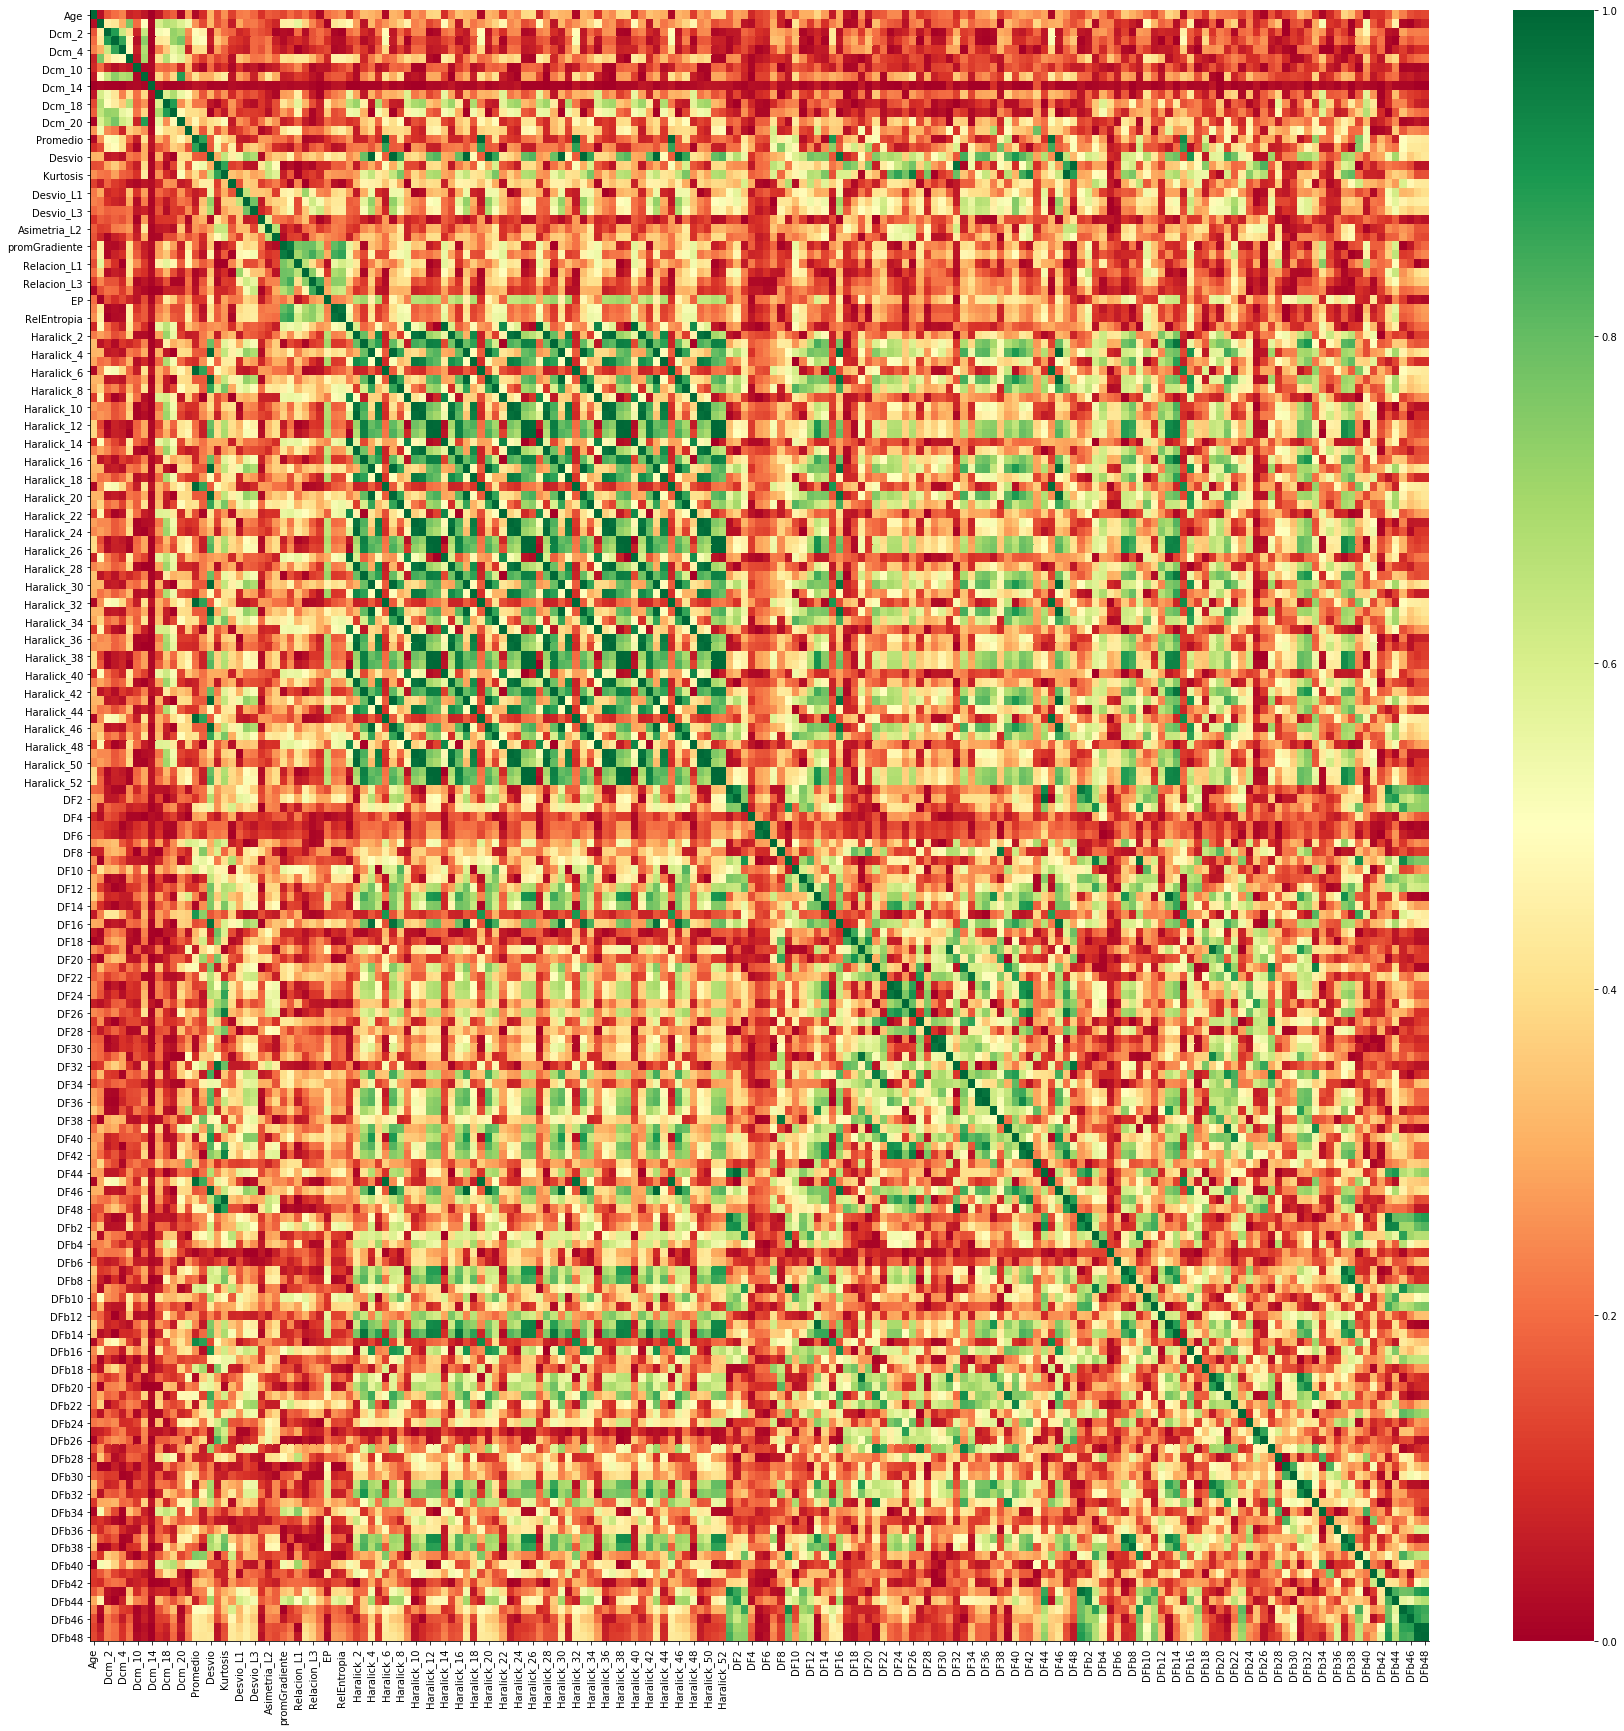

In [333]:
corr = new_df.corr(method='spearman').abs()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)
sns.despine()

Tomamos los pares de variables altamente correlacionadas (>0.95) y se descartamos una de ellas para de esta forma disminuir la dimensión del problema.

In [334]:
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [335]:
_X = []
_Y = []

for column in upper.columns:
    print(column)
    for i in range(upper[column].shape[0]):
        if(upper[column][i] > 0.95):
            print('    ',upper[column].index[i],upper[column][i])
            _X.append(column)
            _Y.append(upper[column].index[i])

Age
Dcm_1
Dcm_2
Dcm_3
Dcm_4
Dcm_9
Dcm_10
Dcm_12
Dcm_14
Dcm_17
Dcm_18
Dcm_19
Dcm_20
Area
Promedio
Media
Desvio
Asimetria
Kurtosis
Moda
Desvio_L1
Desvio_L2
Desvio_L3
Asimetria_L1
Asimetria_L2
Asimetria_L3
promGradiente
Relacion
     promGradiente 0.9607235393653814
Relacion_L1
Relacion_L2
Relacion_L3
Relacion_L4
EP
EPBinaria
RelEntropia
     EPBinaria 0.9744010939097081
Haralick_1
Haralick_2
Haralick_3
Haralick_4
     Desvio 0.9999926707207433
Haralick_5
Haralick_6
     Promedio 0.999994533178518
Haralick_7
     Desvio 0.9998293271072548
     Haralick_4 0.9998457370355267
Haralick_8
Haralick_9
Haralick_10
     Haralick_2 0.975715432344729
     Haralick_5 0.9630389488415794
Haralick_11
     Haralick_2 0.9976085974289369
     Haralick_10 0.9851743259608977
Haralick_12
     Haralick_3 0.952730312148373
Haralick_13
     Haralick_12 0.9954851025098689
Haralick_14
     Haralick_1 0.9956101788727225
Haralick_15
     Haralick_2 0.9935106932079515
     Haralick_10 0.9686034866858437
     Haralick

DF18
DF19
DF20
DF21
DF22
DF23
DF24
     DF23 0.9664208395105627
DF25
DF26
     Kurtosis 0.9541611888285224
DF27
DF28
DF29
DF30
     DF29 0.9669201066273846
DF31
     DF19 0.9762221878975585
DF32
     Asimetria 0.9770862520739223
DF33
     DF21 0.9606824782670011
DF34
     DF22 0.9666088076416576
DF35
DF36
     DF35 0.9739630704375885
DF37
DF38
     DF8 0.9681853430153256
DF39
DF40
DF41
DF42
     DF24 0.9551570277149485
     DF26 0.9528465707244252
     DF41 0.9596709152308106
DF43
DF44
     DF2 0.9989497777559405
DF45
     Promedio 0.9881851265438206
     Haralick_6 0.9882959105534065
     Haralick_19 0.9883105674566534
     Haralick_32 0.9882463866926012
     Haralick_45 0.9883072752534003
DF46
     Desvio 0.9979085279979761
     Haralick_4 0.9979483875345161
     Haralick_7 0.9980358225709778
     Haralick_17 0.9979500737923055
     Haralick_20 0.9980280416205415
     Haralick_30 0.9979272599885938
     Haralick_33 0.9980170016162663
     Haralick_43 0.9979554063399411
     Haralick_

In [336]:
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [338]:
threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

Campos a descartar del análisis futuro por presentar alta correlación con otros campos

In [339]:
print(len(to_drop))
print(to_drop)

78
['Relacion', 'RelEntropia', 'Haralick_4', 'Haralick_6', 'Haralick_7', 'Haralick_10', 'Haralick_11', 'Haralick_12', 'Haralick_13', 'Haralick_14', 'Haralick_15', 'Haralick_16', 'Haralick_17', 'Haralick_18', 'Haralick_19', 'Haralick_20', 'Haralick_21', 'Haralick_22', 'Haralick_23', 'Haralick_24', 'Haralick_25', 'Haralick_26', 'Haralick_27', 'Haralick_28', 'Haralick_29', 'Haralick_30', 'Haralick_31', 'Haralick_32', 'Haralick_33', 'Haralick_34', 'Haralick_35', 'Haralick_36', 'Haralick_37', 'Haralick_38', 'Haralick_39', 'Haralick_40', 'Haralick_41', 'Haralick_42', 'Haralick_43', 'Haralick_44', 'Haralick_45', 'Haralick_46', 'Haralick_47', 'Haralick_48', 'Haralick_49', 'Haralick_50', 'Haralick_51', 'Haralick_52', 'DF6', 'DF16', 'DF24', 'DF26', 'DF30', 'DF31', 'DF32', 'DF33', 'DF34', 'DF36', 'DF38', 'DF42', 'DF44', 'DF45', 'DF46', 'DF47', 'DF48', 'DFb1', 'DFb3', 'DFb9', 'DFb13', 'DFb14', 'DFb19', 'DFb21', 'DFb27', 'DFb31', 'DFb37', 'DFb38', 'DFb43', 'DFb48']


In [340]:
data_corr = new_df.copy()
data_corr = data_corr.drop(to_drop,axis=1)

In [290]:
print("Tamaño original: \n","   Número de imágenes: %i\n" % data_zscore.shape[0], "   Número de campos %i" % new_df.shape[1])
print("Tamaño final: \n","   Número de imágenes: %i\n" % data_corr.shape[0], "   Número de campos %i" % data_corr.shape[1])

Tamaño original: 
    Número de imágenes: 6605
    Número de campos 195
Tamaño final: 
    Número de imágenes: 6605
    Número de campos 117


In [341]:
print('De esta forma es posible reducir el número de campos de interés de %i' % new_df.shape[1], 'a %i' % data_corr.shape[1])



De esta forma es posible reducir el número de campos de interés de 195 a 117


Estos datos de correlaciones aún no han sido procesados por datos faltantes ni fueron normalizados. Siendo el total de datos faltantes:


In [342]:
data_corr.isna().sum().sum()

674

####  7.2 - Análisis de Componentes Principales
Este método no acepta base de datos con datos faltantes. Nótese que aún no se han normalizado los datos pero debemos utilizar un abordaje de imputación de datos faltantes para la implementación del método.


In [442]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
#principalcomponents = pca.fit_transform(new_df[NumFeat_nw]) #da error!
principalcomponents = pca.fit_transform(data_mean[NumFeat_nw])
#principalcomponents = pca.fit_transform(data_median[NumFeat_nw])
#principalcomponents = pca.fit_transform(data_knn[NumFeat_nw])

#Los conjuntos normalizados y con imputación de datos son:
#data_mean_minmax, data_median_minmax,data_knn_minmax - dtz-score, dtz_score_md, dtz_score_knn

In [438]:
pca.components_

array([[ 2.36926222e-06,  6.33592133e-07,  2.64429636e-06, ...,
        -1.43726627e-05, -6.55476347e-07, -4.73236437e-08],
       [-9.33615742e-07,  2.12744994e-07,  4.25305947e-06, ...,
        -8.17146768e-05,  2.20944362e-05,  1.35375462e-06],
       [ 9.20181481e-05, -3.31884691e-05, -3.83702367e-04, ...,
        -1.58460043e-03,  1.90408881e-04,  2.36793015e-05],
       ...,
       [ 2.83479554e-01, -9.60486078e-03, -4.34075943e-02, ...,
         1.03576915e-01,  6.97527811e-02, -3.64430458e-03],
       [ 1.34179143e-01, -7.20784560e-03,  1.02159583e-01, ...,
        -3.68577679e-02, -7.28967117e-03, -2.85284745e-03],
       [ 1.15926753e-01,  3.30964331e-03,  7.68024973e-03, ...,
        -3.86986569e-02, -1.38641130e-02,  6.22927192e-03]])

In [439]:
pca.explained_variance_ratio_

array([6.96498043e-01, 3.03359199e-01, 1.39834263e-04, 1.14075457e-06,
       9.77299115e-07, 3.01311201e-07, 1.38532678e-07, 1.22819217e-07,
       1.18209519e-07, 3.21008740e-08, 2.46768373e-08, 2.09035358e-08,
       1.63114978e-08, 7.56814051e-09, 4.72456738e-09, 4.36981770e-09,
       3.49032361e-09, 2.45214900e-09, 1.37809023e-09, 1.17366791e-09,
       8.83530269e-10, 6.71045585e-10, 4.14560784e-10, 3.87228330e-10,
       3.27114137e-10, 2.95105014e-10, 2.86683421e-10, 2.74678192e-10,
       2.30532721e-10, 2.02375381e-10, 1.81128297e-10, 1.74402075e-10,
       1.52784286e-10, 9.49043437e-11, 8.54614356e-11, 8.04891218e-11,
       6.64259199e-11, 6.15607397e-11, 5.13901704e-11, 4.78871296e-11,
       3.97495280e-11, 3.45012751e-11, 3.18111022e-11, 2.77080417e-11,
       2.39373660e-11, 2.31955934e-11, 1.96727877e-11, 1.87408368e-11,
       1.59945751e-11, 1.40002617e-11])

In [440]:
print("Utilizando ", pca.n_components, " se consigue explicar el ", "%.2f" % pca.explained_variance_ratio_.sum(), " % de la variaza de los datos")

Utilizando  50  se consigue explicar el  1.00  % de la variaza de los datos


Graficamos las primeras 10 componentes

In [441]:
data_pca = pd.DataFrame(data = principalcomponents[:,0:10],columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10',],index=data_zscore.index)

In [354]:
data_pca = pd.concat([data_pca,data_zscore['ACR']],axis=1)
data_pca.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,ACR
Imagen,,,,,,,,,,,
Imagen_0.npy,-9.340639e+05,-7.148914e+04,12626.572881,717.191289,1205.011070,-76.703166,420.101329,837.871779,418.511800,-108.151643,c
Imagen_1.npy,-6.454884e+05,-3.142165e+05,32546.477864,-1648.778831,2366.501487,-465.232281,-260.970635,562.391237,-526.490968,-81.855400,c
Imagen_2.npy,-8.291749e+05,-5.493908e+05,8087.043921,-2160.314713,-1461.070876,-849.805762,-595.464017,655.389627,-67.737666,-31.811979,c
Imagen_3.npy,-1.378703e+06,5.410652e+05,37398.038925,143.147527,-1539.208133,-475.898085,623.310057,526.117884,276.884632,-25.812836,c
Imagen_4.npy,3.859616e+06,1.002188e+06,4039.307313,902.708720,929.426568,-1235.851393,198.324973,344.636110,-25.090668,-55.220024,c


A _prima facie_ no se observa que la proyección en componentes principales nos brinde una mayor resolución, en el sentido de que individualiza mejor los grupos con diferentes "ACR", pero es algo que debemos seguir explorando. Más aún, las 5 primeras componentes parecieran contener la información necesaria para distiguir los grupos ya que luego las distribuciones se vuelven similares.

#### 8- Combinando abordajes: 

## Remoción de Outliers

### IQR quantile

In [99]:
data_iqr = dataframe.copy()

In [100]:
Q1 = data_iqr[NumFeat].quantile(0.25)
Q3 = data_iqr[NumFeat].quantile(0.75)
IQR = Q3 - Q1

In [101]:
data_iqr = data_iqr[~((data_iqr[NumFeat] < (Q1 - 1.5 * IQR)) |(data_iqr[NumFeat] > (Q3 + 1.5 * IQR))).any(axis=1)]
data_iqr.shape,data_zscore.shape

((2209, 197), (6605, 197))

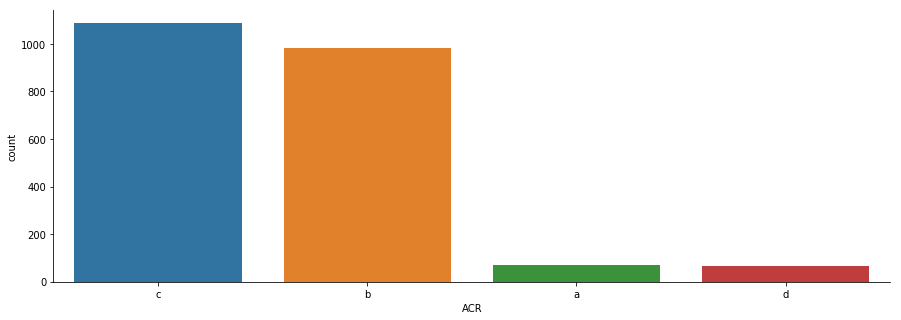

In [102]:
plt.figure(figsize=(15,5))
sns.countplot(data_iqr["ACR"])
sns.despine()

### Z-score

In [103]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_zscore[NumFeat]))

In [104]:
data_zs = data_zscore.copy()
data_zs = data_zs[(z < 3).all(axis=1)]
data_zs.shape,data_zscore.shape

((4656, 197), (6605, 197))

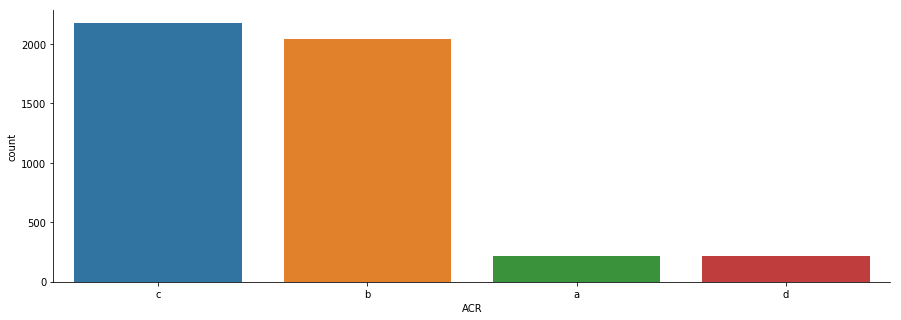

In [105]:
plt.figure(figsize=(15,5))
sns.countplot(data_zs["ACR"])
sns.despine()

## Reducción de dimensiones

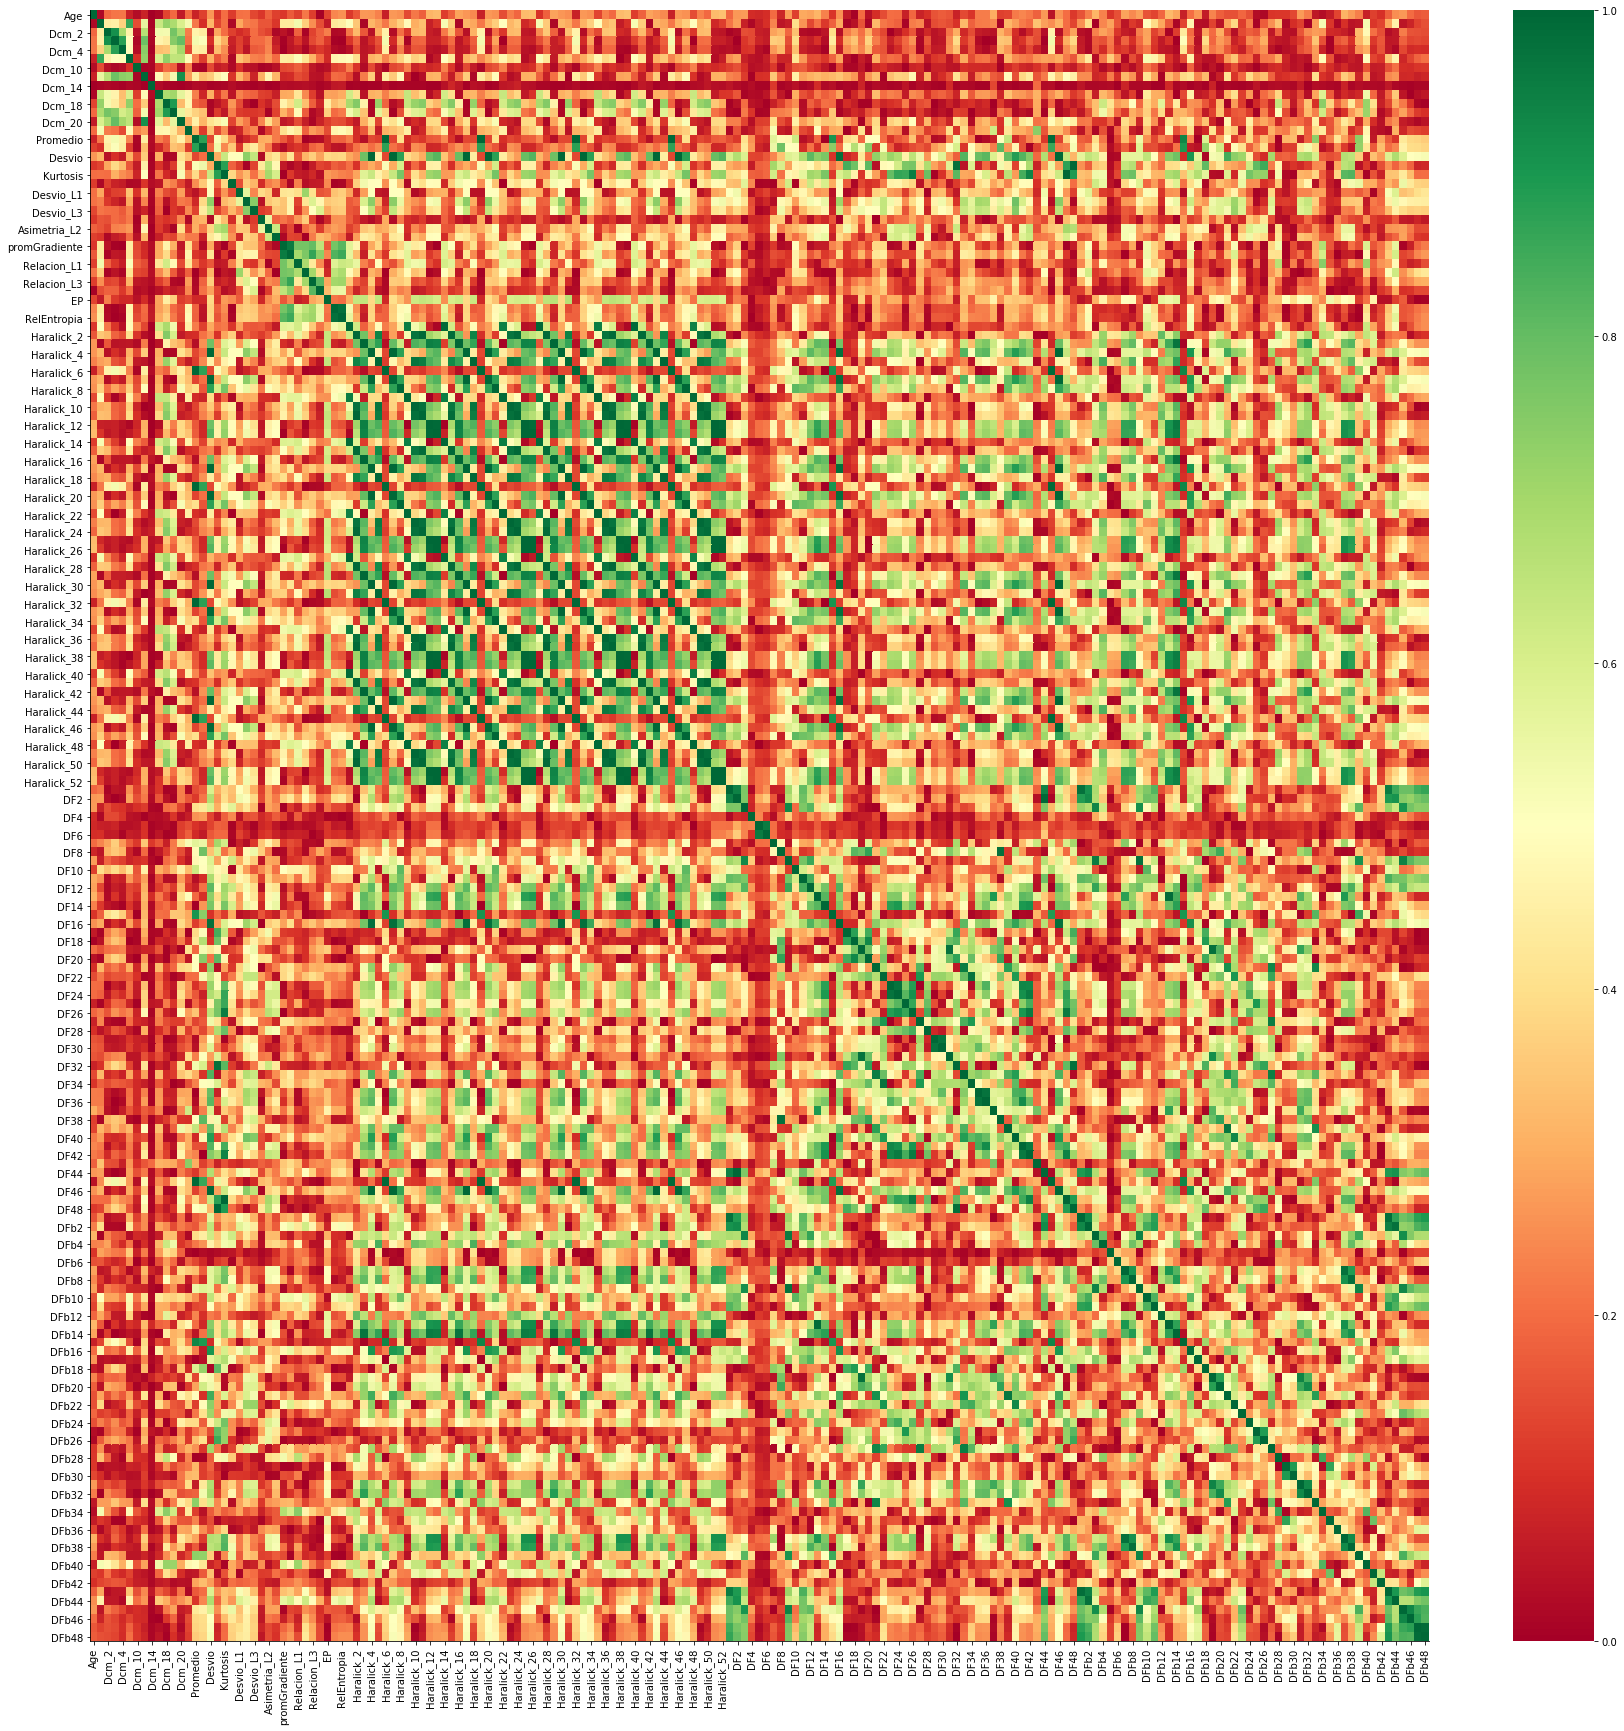

In [106]:
corr = data_zs[NumFeat].corr(method='spearman').abs()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)
sns.despine()

In [107]:
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [108]:
threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [109]:
data_redu = data_zs.copy()
data_redu.drop(to_drop,axis=1,inplace=True)

In [112]:
data_redu.shape,data_zs.shape

((4656, 119), (4656, 197))

In [126]:
CatFeat = [x for x in data_redu.columns if data_redu[x].dtype != 'float64']
NumFeat = [x for x in data_redu.columns if data_redu[x].dtype == 'float64']

print('Cantidad' + str('\n')+
      '   variables numéricas     '+ str(len(NumFeat)) + str('\n')
      + '   variables discretas  ' + str(len(CatFeat)))

Cantidad
   variables numéricas     105
   variables discretas  14


In [114]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
principalcomponents = pca.fit_transform(data_zs[NumFeat])

In [115]:
pca.explained_variance_ratio_

array([0.33362001, 0.14896363, 0.14281273, 0.10288054, 0.03762401,
       0.03291648, 0.0239563 , 0.02286572, 0.0142177 , 0.01311298,
       0.010672  , 0.01003459, 0.00848645, 0.00756919, 0.00703029,
       0.00652754, 0.00608803, 0.00581886, 0.00486169, 0.00457081,
       0.0042002 , 0.0039974 , 0.00330042, 0.00313898, 0.00278278,
       0.00254049, 0.00246247, 0.00219375, 0.00199622, 0.00179657])

In [128]:
plt.plot(pca.explained_variance_ratio_)
sns.despine()

In [72]:
print("Utilizando ", pca.n_components, " se consigue explicar el ", "%.2f" % pca.explained_variance_ratio_.sum(), " % de la variaza de los datos")

Utilizando  30  se consigue explicar el  0.97  % de la variaza de los datos


In [75]:
data_pca = pd.DataFrame(data = principalcomponents[:,0:10],columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10',],index=data_zs.index)
data_pca = pd.concat([data_pca,data_zs['ACR']],axis=1)

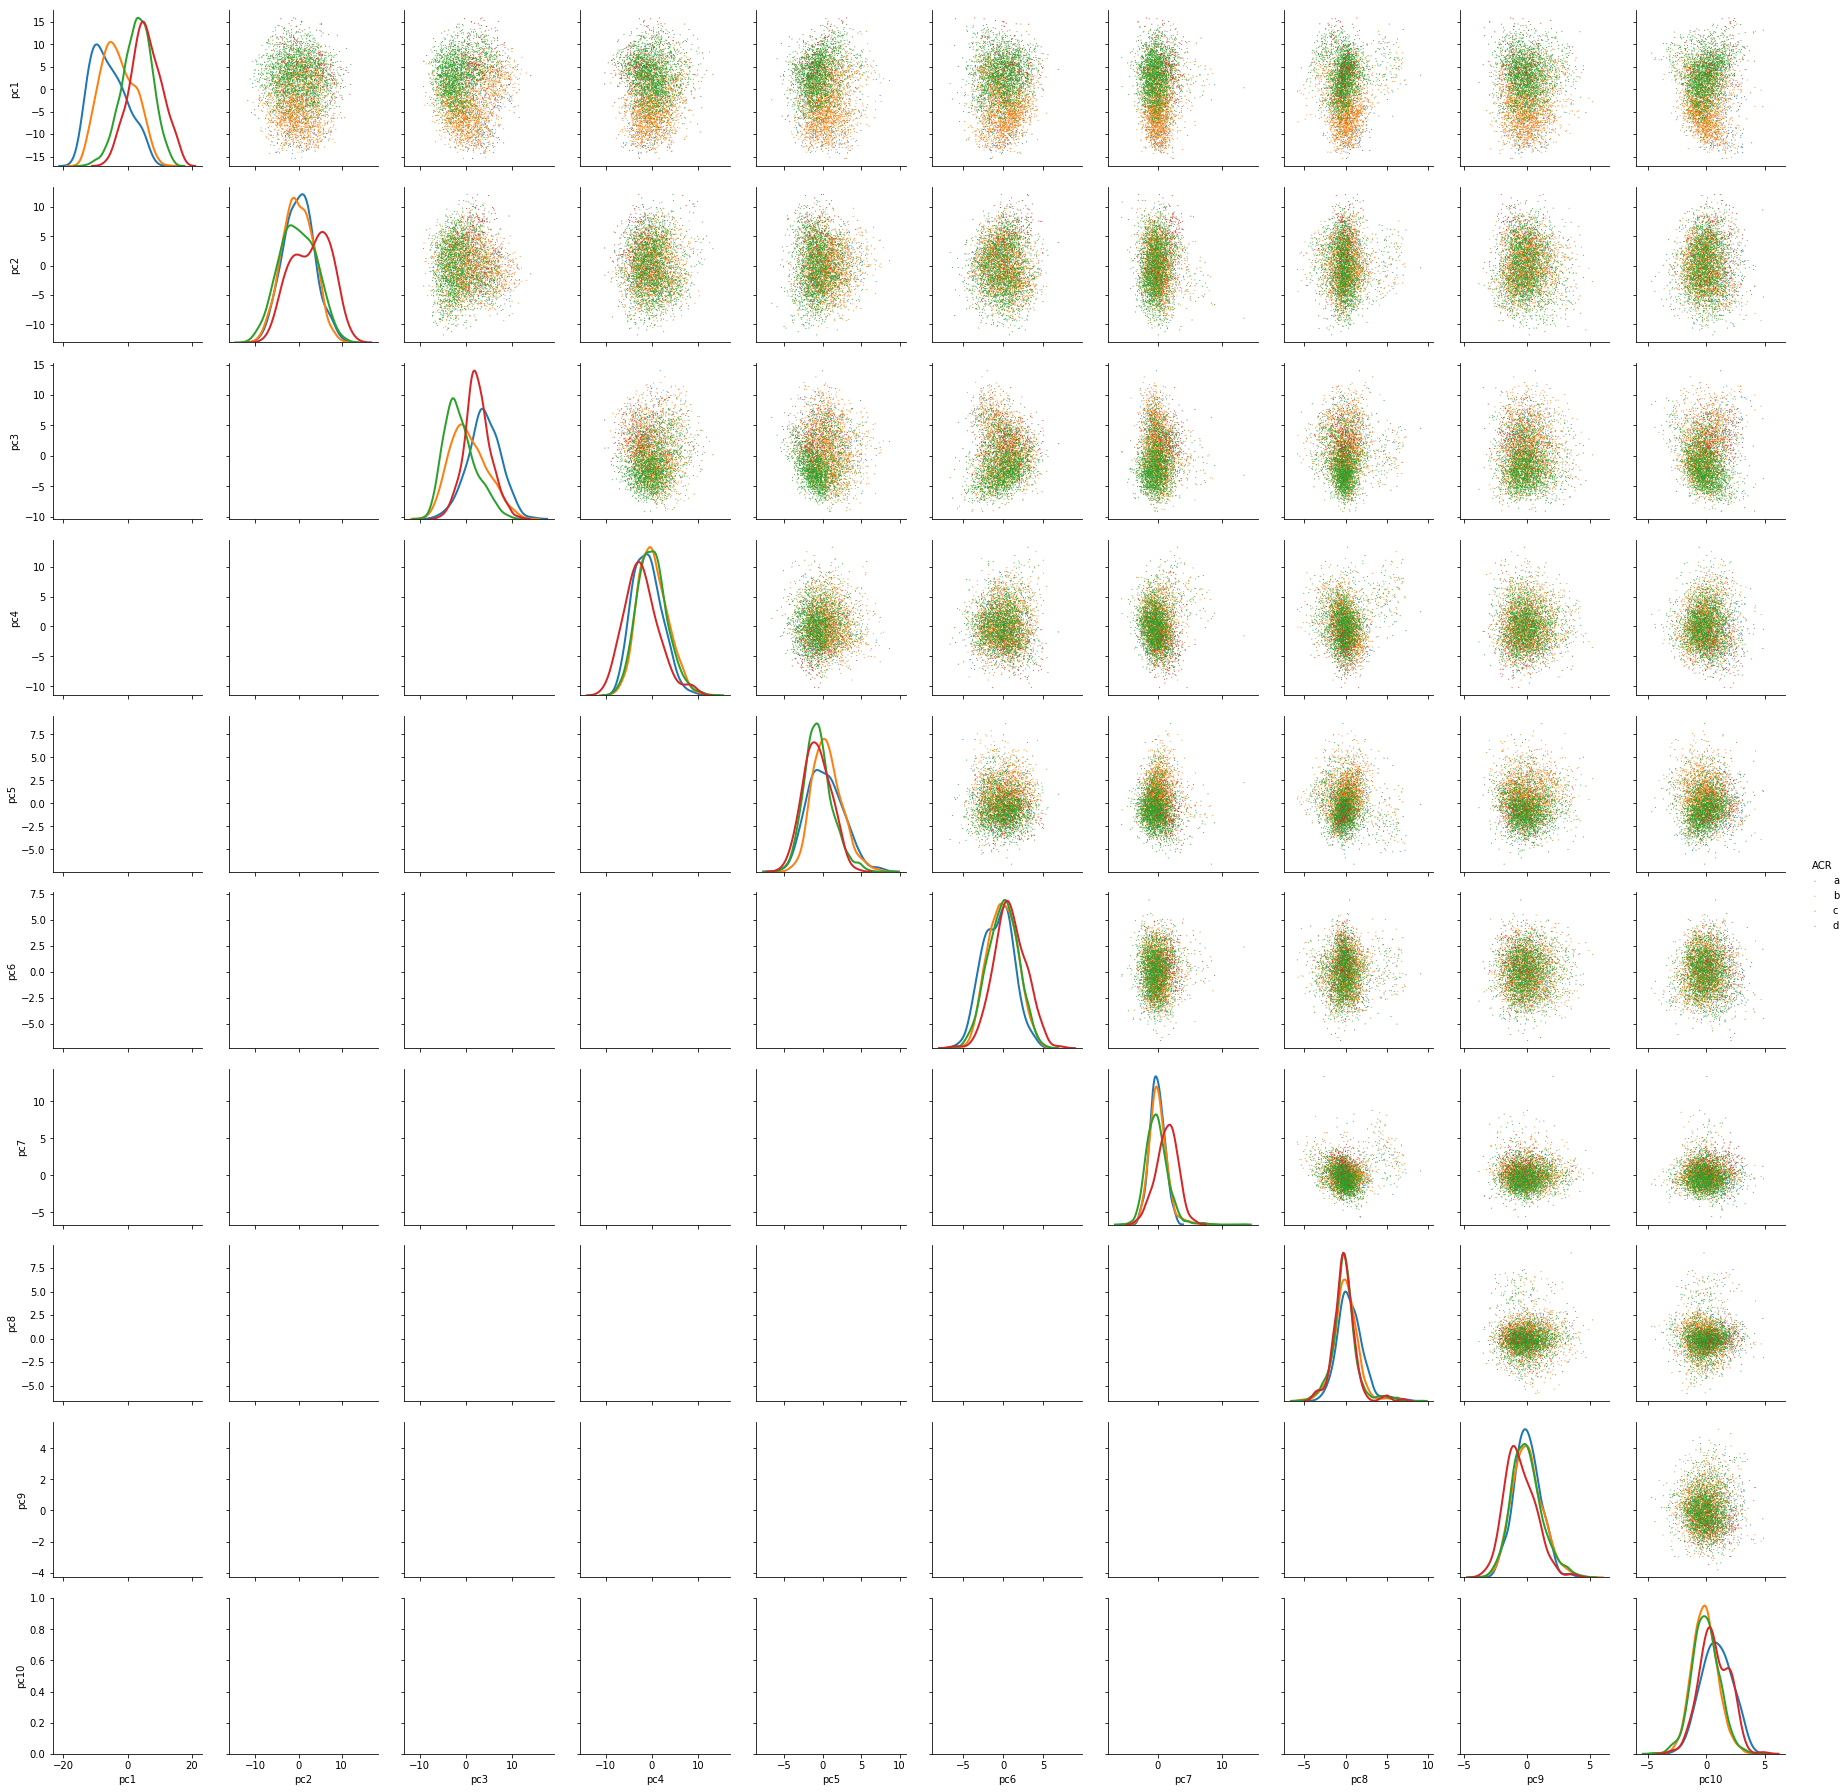

In [76]:
g = sns.PairGrid(data_pca,hue='ACR',hue_order=["a","b","c","d"],despine=True,diag_sharey=False)
g.map_upper(plt.scatter,s=1,edgecolors='None')
#g.map_lower(sns.kdeplot,n_levels=3)
g.map_diag(sns.kdeplot, lw=2, legend=False)
g.add_legend()
sns.despine()